# A short Tutorial to process sample NIRISS AMI simulations

* fit fringes for a simulated target and calibrator sequence (no WFE evolution between them)
* calibrate target closure phases with the calibrator
* fit for a binary

In [1]:
import glob
import os, sys, time
from astropy.io import fits
import numpy as np

from nrm_analysis import nrm_core, InstrumentData


import matplotlib.pyplot as plt
%matplotlib inline

/Users/anand/anaconda3/envs/astroconda/lib/python3.5/site-packages/pysynphot/locations.py:329: UserWarning: Extinction files not found in /Users/anand/data/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/Users/anand/anaconda3/envs/astroconda/lib/python3.5/site-packages/pysynphot/refs.py:118: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for /Users/anand/data/cdbs/mtab/*_tmg.fits
  'functionality will be SEVERELY crippled. ' + str(e))
/Users/anand/anaconda3/envs/astroconda/lib/python3.5/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /Users/anand/data/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))


### Where the data lives:

In [2]:
test_tar = "../example_data/example_niriss/t_binary_s198.3_p143.9_cr0.01__nispsf_jit7.0_F480M_15x_ov__00.fits"
test_cal = "../example_data/example_niriss/c_binary_s198.3_p143.9_cr0.01__nispsf_jit7.0_F480M_15x_ov__00.fits"


### First we specify the instrument & filter (F480M in this case):

(defaults: Spectral type set to A0V)

In [3]:
niriss = InstrumentData.NIRISS("F480M")

NRM_Mask_definitions.NIRISS: maskname jwst_g7s6c
self.maskname == "jwst_g7s6c":
cvsupport_threshold is:  {'F480M': 0.02, 'F380M': 0.02, 'F277W': 0.02, 'F430M': 0.02}
{'F480M': 0.02, 'F380M': 0.02, 'F277W': 0.02, 'F430M': 0.02}
================== F480M ===================
bin by 30   from  1007  to 33
TRIMming
post trim - spec.shape (20, 2)
post specbin - spec.shape (20, 2)
20 spectral samples between 4.442 and 5.185 um
filter F480M band.shape (20, 2) 
 [[2.30595912e-04 4.44200000e-06]
 [1.12156668e-02 4.56950000e-06]
 [4.07489043e-02 4.59950000e-06]
 [1.00685445e-01 4.62950000e-06]
 [3.57056732e-01 4.65950000e-06]
 [8.57238909e-01 4.68950000e-06]
 [9.66623765e-01 4.71950000e-06]
 [9.15453765e-01 4.74950000e-06]
 [9.35188058e-01 4.77950000e-06]
 [9.91308648e-01 4.80950000e-06]
 [9.79337483e-01 4.83950000e-06]
 [9.27134702e-01 4.86950000e-06]
 [9.32951022e-01 4.89950000e-06]
 [9.29345466e-01 4.92950000e-06]
 [6.72698424e-01 4.95950000e-06]
 [2.52360663e-01 4.98950000e-06]
 [4.12254935e-0

### Next: get fringe observables via image plane fringe-fitting
* Need to pass the InstrumentData object, some keywords.
* Files will be saved into specified directory + new directory named by filename


In [4]:
ff_t = nrm_core.FringeFitter(niriss, savedir="targ/", oversample=3, interactive=False) 
ff_c = nrm_core.FringeFitter(niriss, savedir="cal/", oversample=3, interactive=False) 
#in general set interactive to False unless you really don't know what you are doing
                                                        

In [5]:
# This can take a little while -- there is a parallelization option, set threads=n_threads
# output of this is long -- may also want to do this scripted instead of in notebook,
# leaving off the output in this example.
ff_t.fit_fringes(test_tar)
ff_c.fit_fringes(test_cal)

Before cropping: (81, 81)
utils.min_distance_from_edge: peaking on:  9018889.14742086
putils.min_distance_from_edge: peak x,y: 41 39
Cropped image shape: (79, 79)
value at center: 9018889.14742086
(array([39]), array([39]))
C is (39, 39)
sigh, sinv = 0.0013874948955219098.0.0013153077254387663avgh, avgv = -0.031811347173495506.0.036201936770637475
tilth over newmaskh mean -3.2343e-02 sig 3.7660e-03
tiltv over newmaskh mean 3.5718e-02 sig 3.6623e-03
>>> utils.find_centroid(): M.shape (79, 79), a.shape (79, 79)
>>> utils.find_centroid(): M.shape (79, 79), cvpha.shape (79, 79)
>>>> nrm_core: centroid offsets (-0.40665195103564433, 0.44909283145932777) from utils.centroid() <<<<
>>>> nrm_core: center of light in array coords (ds9) [39.44909283 38.59334805] <<<<
>>>> nrm_core.fit_image(): refslice 6 lines commented out cf LG+ <<<<

**** nrm.core.fit_fringes_single_integration:    <<HOLD_CENTERING>> False
**** nrm.bestcenter (0.44909283145932777, -0.40665195103564433)  nrm.xpos 0.44909283145

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.40242445, 116.74773472]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.40242445, 116.74773472]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.40242445, 116.74773472]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.20124882, 119.35838415]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.20124882, 119.35838415]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.20124882, 119.35838415]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.61452788, 116.95300836]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.61452788, 116.95300836]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.61452788, 116.95300836]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.99513323, 119.36074356]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.99513323, 119.36074356]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.99513323, 119.36074356]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.60237698, 119.35783606]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.60237698, 119.35783606]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.60237698, 119.35783606]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.59976854, 119.16601388]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.59976854, 119.16601388]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.59976854, 119.16601388]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.20315589, 119.55119652]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.20315589, 119.55119652]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.20315589, 119.55119652]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.79551104, 116.76640704]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.79551104, 116.76640704]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.79551104, 116.76640704]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.81028592, 117.3566766 ]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.81028592, 117.3566766 ]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.81028592, 117.3566766 ]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.99632052, 119.1548259 ]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.99632052, 119.1548259 ]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.99632052, 119.1548259 ]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.00022564, 119.34389202]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.00022564, 119.34389202]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.00022564, 119.34389202]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.19980953, 119.35654795]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.19980953, 119.35654795]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.19980953, 119.35654795]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.99449015, 119.53991427]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.99449015, 119.53991427]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.99449015, 119.53991427]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.59155535, 119.5539459 ]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.59155535, 119.5539459 ]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.59155535, 119.5539459 ]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.15467726, 116.69046477]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.15467726, 116.69046477]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.15467726, 116.69046477]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.75295004, 116.68474826]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.75295004, 116.68474826]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.75295004, 116.68474826]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.14443417, 119.08204039]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.14443417, 119.08204039]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.14443417, 119.08204039]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.54067532, 119.69101059]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.54067532, 119.69101059]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.54067532, 119.69101059]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.16127586, 116.68610681]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.16127586, 116.68610681]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.16127586, 116.68610681]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.15131768, 116.68284677]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.15131768, 116.68284677]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.15131768, 116.68284677]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.36046765, 116.68287164]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.36046765, 116.68287164]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.36046765, 116.68287164]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.95736677, 116.67928486]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.95736677, 116.67928486]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.95736677, 116.67928486]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.75457641, 116.67954756]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.75457641, 116.67954756]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.75457641, 116.67954756]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.15117448, 119.08619894]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.15117448, 119.08619894]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([119.15117448, 119.08619894]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.3506748 , 116.67806021]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.3506748 , 116.67806021]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.3506748 , 116.67806021]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.14480386, 119.47796236]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.14480386, 119.47796236]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.14480386, 119.47796236]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.1539231 , 119.47955969]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.1539231 , 119.47955969]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([117.1539231 , 119.47955969]), 'Shape:', (237, 237)

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.9589625, 116.8824827]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.9589625, 116.8824827]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.9589625, 116.8824827]), 'Shape:', (237, 237))
    

    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.94497749, 119.28553429]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.94497749, 119.28553429]), 'Shape:', (237, 237))
    ctrs                                    analyticnrm2:model_arrayIdeal
    +2.640000    -0.000000
    +0.000000    +2.286310
    +1.320000    -2.286310
    -1.320000    +2.286310
    -1.980000    +1.143150
    -1.320000    -2.286310
    -1.980000    -1.143150
('Center:', array([116.94497749, 119.28553429]), 'Shape:', (237, 237)

You'll find some new files. Text files save the observables you are trying to measure, but there are also some diagnostic fits files written: centered_X are the cropped/centered data, modelsolution_XX are the best fit model to the data, and residual_XX is the difference between the two. 

Coming soon: propogating errors from fringe-fitting to observables.

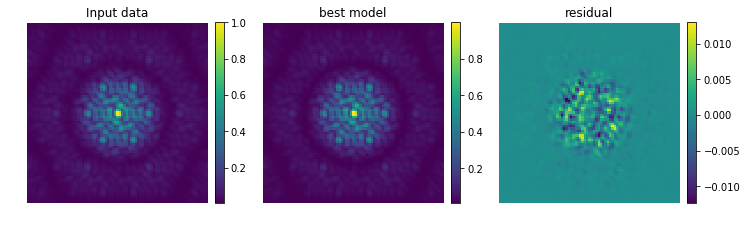

In [6]:
data = fits.getdata("targ/t_binary_s198.3_p143.9_cr0.01__nispsf_jit7.0_F480M_15x_ov__00/centered_5.fits")
fmodel = fits.getdata("targ/t_binary_s198.3_p143.9_cr0.01__nispsf_jit7.0_F480M_15x_ov__00/modelsolution_05.fits")
res = fits.getdata("targ/t_binary_s198.3_p143.9_cr0.01__nispsf_jit7.0_F480M_15x_ov__00/residual_05.fits")

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.title("Input data")
im = plt.imshow(pow(data/data.max(), 0.5))
plt.axis("off")
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(132)
plt.title("best model")
im = plt.imshow(pow(fmodel/data.max(), 0.5))
plt.axis("off")
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(133)
plt.title("residual")
im = plt.imshow(res/data.max())
plt.axis("off")
plt.colorbar(fraction=0.046, pad=0.04)


If you don't want to clog up your hardrive with fits files you can initialize FringeFitter with keyword "save_txt_only=True" -- but you may want to save out everything the first time you reduce the data to check it. Above we can see a pretty good fit the magnification of the model is a bit off. This shows up as a radial patter in the residual. Finely fitting the exact magnification and rotation should be done before fringe fitting. 

### Calibration is simple: point to the data

The most important thing is to pass the right InstrumentData object with correct parameters so wavelength, pixelscale, etc. can be interpreted into on-sky spatial frequency. This can write out an oifits file.

In [7]:
tdir = "targ/t_binary_s198.3_p143.9_cr0.01__nispsf_jit7.0_F480M_15x_ov__00/"
cdir = "cal/c_binary_s198.3_p143.9_cr0.01__nispsf_jit7.0_F480M_15x_ov__00/"
calib = nrm_core.Calibrate([tdir, cdir], niriss, savedir = "calibrated_example/", interactive=False)

exposures flagged: []
exposures flagged: []


/Users/anand/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:688: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/anand/gitsrc/agreenbaum/ImPlaneIA/nrm_analysis/nrm_core.py:678: RuntimeWarning: invalid value encountered in true_divide
  self.v2_calibrated = self.v2_mean_tar/self.v2_mean_tot


In [8]:
calib.save_to_oifits("exampleoifitsfiles.oifits") # will save into specified "savedir"
# Saved to oifits files are average fringe phasses, closure phases, visibility amplitudes,  
# closure amplitudes & errors over the sequence of observations, wavelength and baseline info

{}
no mask rotation


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 15

### Now what to do with an oifits file? Example: fit a binary

In [ ]:
# BinaryAnalyze module in nrm_core is a convenient way to load in your oifits file
ba = nrm_core.BinaryAnalyze("calibrated_example/exampleoifitsfiles.oifits", savedir="calibrated_example/")

In [ ]:
# Want to see what your closure phases look like?
plt.plot(ba.cp, '.')
# Bispectrum amplitudes:
plt.plot(ba.t3amp, '.')

In [ ]:
# Can do a coarse fit for binary parameters. 
# The binary in this case has a contrast of 0.01 at about 200mas, 
# so it should be pretty easy to recover.
coarse_params = ba.chi2map(nstep=45, maxsep=400, clims=[1e-4, 0.9])

In [ ]:
plt.figure()
plt.plot(45/2.0 -0.5,45/2.0 - 0.5, marker="*", color='w', markersize=20)
plt.imshow(np.sqrt(ba.significance), cmap="cubehelix", interpolation="nearest")
plt.xlabel("RA (mas)")
plt.ylabel("DEC (mas)")
plt.xticks(np.linspace(0, 45, 5), np.linspace(ba.ras.min(), ba.ras.max(), 4+1))
plt.yticks(np.linspace(0, 45, 5), np.linspace(ba.decs.min(), ba.decs.max(), 4+1))
plt.gca().invert_yaxis()
plt.colorbar()

## We can now do a finer fit with this coarse search as a starting point

For a finer fit you can use the run_emcee method, or if you want more control you can define your own likelihood function

In [ ]:
con, sep, pa = np.array(coarse_params)
if pa > 180.0:
    pa = 360-pa
guess = {"con":con, "sep":sep, "pa":pa}
priors = [(1e-5, 0.99), (20.0, 400.0), (-180.0,180.0)]
ba.run_emcee(guess, nwalkers=100, niter=1000, priors=priors, \
                     threads=4, burnin = 100, \
                     # scale is to account for rendundancy in closure phase baselines
                     scale = np.sqrt(7/3.0))
# set so it will show in the notebook in addition to being written out
ba.plot="on"
ba.corner_plot("test_mcmc.pdf")

In [ ]:
from nrm_analysis.modeling.binarymodel import model_cp_uv, model_t3amp_uv

def logl(data, err, model):
    """
    Likelihood given data, errors, and the model values
    These are all shape (nobservable, nwav)
    """
    #err*=np.sqrt(10.0/3.0)
    chi2 = np.sum(((data-model)/err)**2)
    loglike = -chi2/2.0
    return loglike

def cp_binary_model(params, binset, priors):
    """
    len(params) must be len(nrank) +2 (for sep, pa)
    """
    for i in range(len(params)):
        if (params[i] < priors[i][0] or params[i] > priors[i][1]):  
            return -np.inf

    contrasts = params[2:]
    seps = params[0]
    pas = params[1]

    model_cp = model_cp_uv(binset.uvcoords, contrasts, seps, pas, 1.0/binset.wavls)
    ll = logl(binset.cp, binset.cperr , model_cp)
    return ll

def all_binary_model(params, binset, priors):
    
    for i in range(len(params)):
        if (params[i] < priors[i][0] or params[i] > priors[i][1]):  
            return -np.inf

    contrasts = params[2:]
    seps = params[0]
    pas = params[1]

    model_cp = model_cp_uv(binset.uvcoords, contrasts, seps, pas, 1.0/binset.wavls)
    model_t3 = model_t3amp_uv(binset.uvcoords, contrasts, seps, pas, 1.0/binset.wavls)
    model_all = np.concatenate((model_cp, model_t3))
    obs_all = np.concatenate((binset.cp, binset.t3amp))
    obserr_all = np.concatenate((binset.cperr, binset.t3amperr))
    ll = logl(obs_all, obserr_all , model_all)
    return ll


In [ ]:
import emcee
con, sep, pa = np.array(coarse_params)
if pa>180.0:
    pa = 360 - pa
params = np.array([sep, pa, con])
nwalkers = 100
niter = 1000
p0 = [params + 0.1*params*np.random.rand(len(params)) for i in range(nwalkers)]
priors = [ (0.0, 300.0), (-180.0, 180.0), (1e-4, .99)]
sampler = emcee.EnsembleSampler(nwalkers, len(params), cp_binary_model,
                                threads=1, args=[ba, priors])
t0 = time.time()
pos, prob, state = sampler.run_mcmc(p0, 100)
sampler.reset()
t1 = time.time()
print "burn in complete, took ", t1-t0, "s"
pos, prob, state = sampler.run_mcmc(pos, niter)
t2 = time.time()
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.acceptance_fraction)))
print "This number should be between ~ 0.25 and 0.5 if everything went as planned."
print "ran mcmc, took", t2 - t1, "s"
chain = sampler.flatchain
fullchain = sampler.chain


In [ ]:
import corner

samples = sampler.chain[:, 50:, :].reshape((-1, len(params)))
pq = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
         zip(*np.percentile(samples, [1, 50, 99],axis=0)))
print("================")
print("Recovered:")
print("---------")
print(pq[2][0],"+/-",pq[2][1],pq[2][2])
print(pq[0][0],"+/-",pq[0][1],pq[0][2])
print(pq[1][0],"+/-",pq[1][1],pq[1][2])
print("================")

fig = corner.corner(chain, bins = 50)